In [ ]:
### Person can jump 1 step or 2 step at a time so how many ways can person reach nth level 
###### ITS SIMPLE FIBONACCI SEQUENCE
### Two variable shofted  for n-1 times
class Solution:
    def climbStairs(self, n: int) -> int:
        one, two = 1, 1

        for i in range(n-1):
            temp = one + two
            two = one
            one = temp

        return one
    

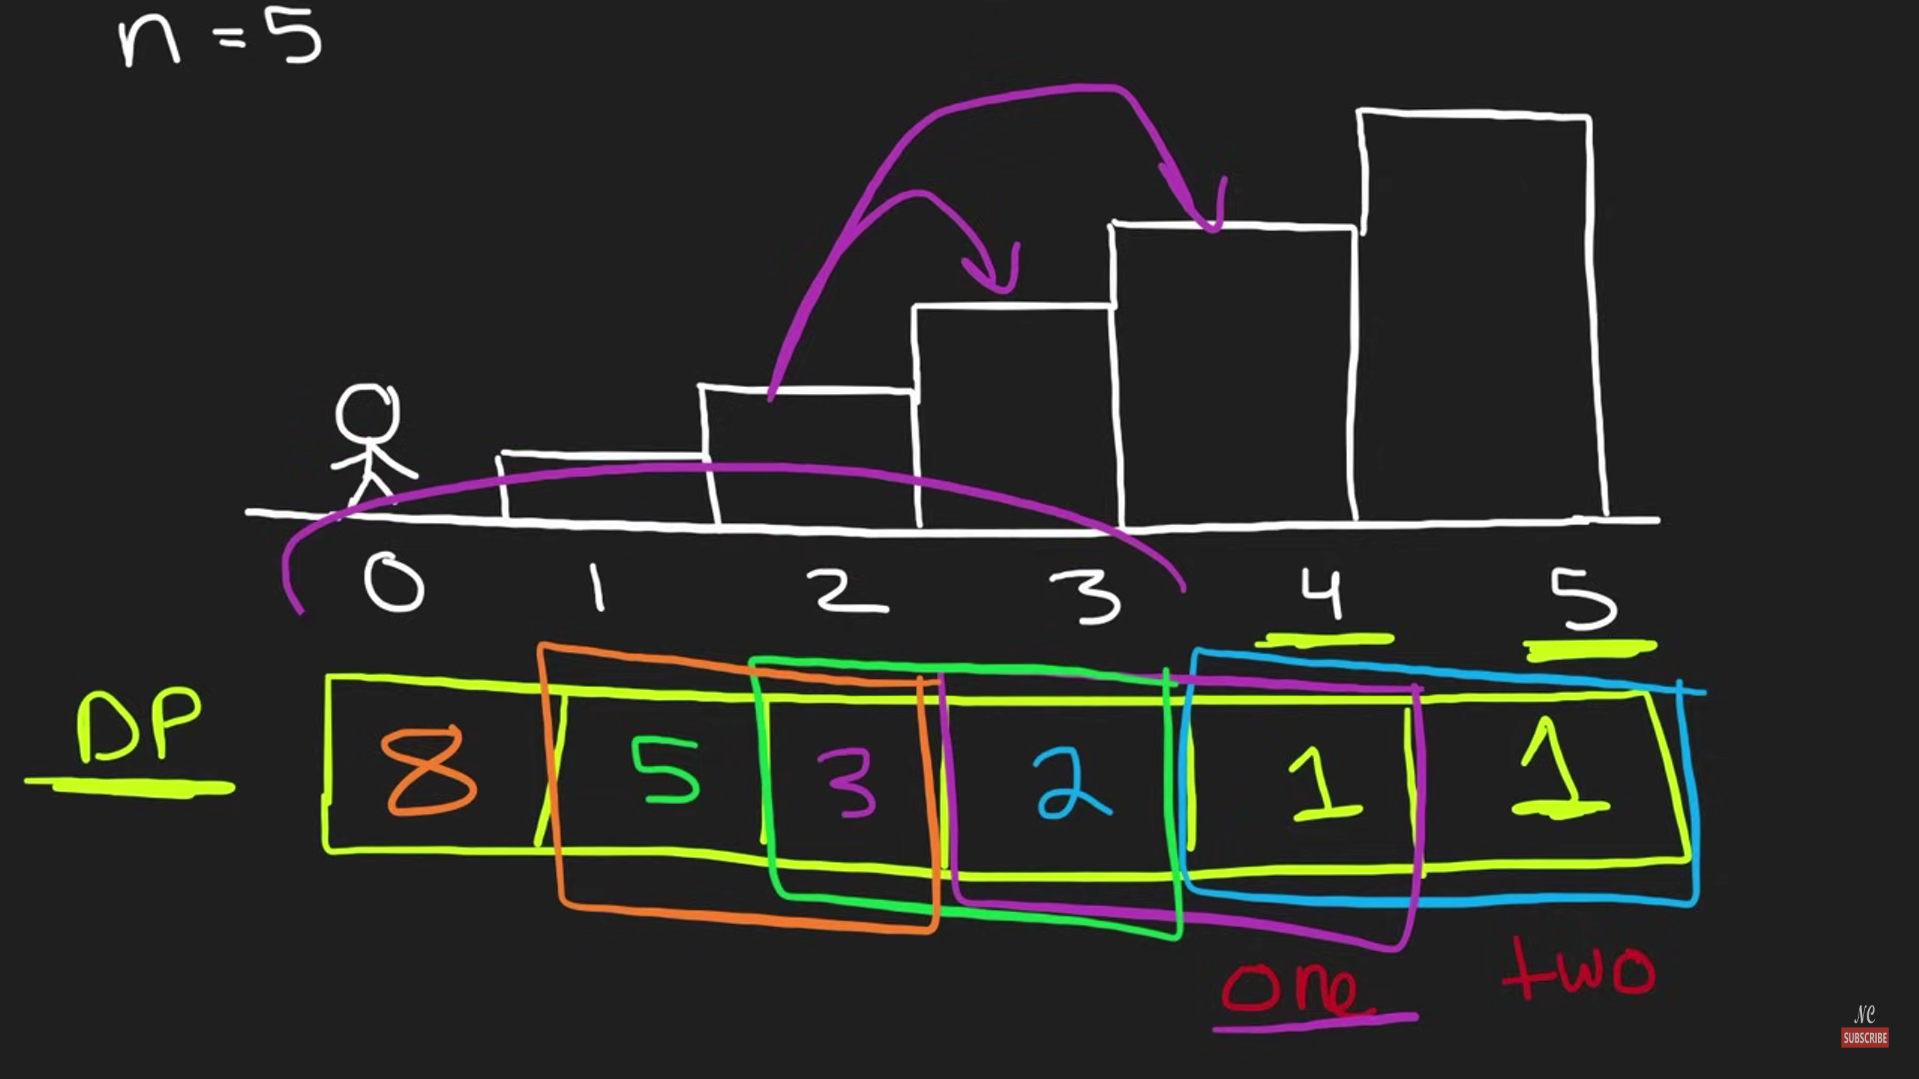

In [ ]:
### Minimum cost to reach top level, you can either start from 0 index or 1 index
class Solution:
    def minCostClimbingStairs(self, cost: List[int]) -> int:
        cost.append(0)

        for i in range(len(cost) - 3, -1, -1):
            cost[i] = min(cost[i] + cost[i+1], cost[i] + cost[i+2])

        return min(cost[0], cost[1])

In [ ]:
### House Robber - 1
# Basically we have to ask this question every time that
what can we rob till now like upto last element, and since recursion so that value present there will
exactly hold the amount yuo can rob till that point
so you just have to compare like if it is better to 
rob till last point or
rob the one before last point and current elemant
and then get max of above two case.

class Solution:
    def rob(self, nums: List[int]) -> int:
        rob1, rob2 = 0, 0

        # [rob1, rob2, n, n+1...]
        for n in nums:
            newrob = max(rob1 + n, rob2) # you have two choice either rob1 + n OR rob2
            rob1 = rob2 # in next case we want rob1 to now be at rob2 place
            rob2 = newrob # and rob2 will be the new compute max
        
        return rob2

In [ ]:
### House robber - 2
Basically the same as 1 just that we have to pass 2 chunks of array
one chunk exclusing the first element and send rest
second chunk with excluding the last element
this is done since the array is circular arrgement of house and in no case we want first and last
element to be check in the same way we did in house robber 1 so to simply this
that we never want first and last elemnt to be together to smart divide this array in two segment
meaning that one arry excluding start elemnt [1:] and the second array exculding last element [:-1]
and these both arrays will be passed the helper fucntion inptyhon which si the same we wrote for
house robber 1

class Solution:
    def rob(self, nums: List[int]) -> int:
        return max(nums[0], self.helper(nums[1:]), self.helper(nums[:-1]))
    
    def helper (self, houses):
        rob1, rob2 = 0, 0
        
        for n in houses:
            newrob = max(rob1 + n, rob2)

            rob1 = rob2
            rob2 = newrob
        
        return rob2


In [ ]:
### Longest palindromic substring
Basically you consoder every element as center of plaindrom and explan right and left and on every expantion you check
if the left, right is in range and every ieration is palnidrom as well like left and rigth are equal

class Solution:
    def longestPalindrome(self, s: str) -> str:
        res = ""
        resLen = 0

        for i in range(len(s)):
            # odd length
            l, r = i, i
            while l >= 0 and r < len(s) and s[l] == s[r]:
                if (r - l + 1) > resLen:
                    res = s[l : r + 1]
                    resLen = r - l + 1
                l -= 1
                r += 1

            # even length
            l, r = i, i + 1
            while l >= 0 and r < len(s) and s[l] == s[r]:
                if (r - l + 1) > resLen:
                    res = s[l : r + 1]
                    resLen = r - l + 1
                l -= 1
                r += 1

        return res

### SLEF SOLVED (Even I was shocked, but i knew that base logic boz of the below problem)
class Solution:
    def longestPalindrome(self, s: str) -> str:
        res = ''

        for i in range(len(s)):
            l = i
            r = i
            while l >= 0 and r < len(s) and s[l] == s[r]:
                curr = s[l:r]
                if len(curr) >= len(res):
                    res = s[l:r+1]
                l -= 1
                r += 1
            
            l = i
            r = i + 1
            while l >=0 and r < len(s) and s[l] == s[r]:
                if len(s[l:r]) >= len(res):
                    res = s[l:r+1]
                l -= 1
                r += 1
        
        return res
        

SyntaxError: invalid syntax (1578878001.py, line 2)

In [ ]:
### Max number of Planindromic substrings
Basically you ahve find how many max subtring are there ingiven string also te substring have to bet palindrome
Same logic consider every element of string as center and expland left and right and here keep a counter
which you update each time you get a planindrome instead og the above problem where you were checking that if
current found palindromic subtring is greater than alreadyd found here you simple update counter once you find
a palindromic subtring.

class Solution:
    def countSubstrings(self, s: str) -> str:

        res = 0

        for i in range(len(s)):
            # For ODD length string boz l,r are at same i position so when you increse/dec both by 1 in each iteration then you are checking substring of len 1,3,5...
            l = i
            r = i
            while l >= 0 and r < len(s) and s[l] == s[r]:
                res += 1
                l -= 1
                r += 1
            
            # For Even length subdtring as above is for Odd len in current we start 2 len as base and expand one on each side so we get substring od len 2,4,..
            l = i
            r = i + 1
            while l >=0 and r < len(s) and s[l] == s[r]:
                res += 1
                l -= 1
                r += 1
        
        return res
        

In [ ]:
### Decode ways
class Solution:
    def numDecodings(self, s: str) -> int:
        # Memoization
        dp = {len(s): 1}

        def dfs(i):
            if i in dp:
                return dp[i]
            if s[i] == "0":
                return 0

            res = dfs(i + 1)
            if i + 1 < len(s) and (
                s[i] == "1" or s[i] == "2" and s[i + 1] in "0123456"
            ):
                res += dfs(i + 2)
            dp[i] = res
            return res

        return dfs(0)

        # Dynamic Programming
        dp = {len(s): 1}
        for i in range(len(s) - 1, -1, -1):
            if s[i] == "0":
                dp[i] = 0
            else:
                dp[i] = dp[i + 1]

            if i + 1 < len(s) and (
                s[i] == "1" or s[i] == "2" and s[i + 1] in "0123456"
            ):
                dp[i] += dp[i + 2]
        return dp[0]


In [ ]:
### Coin change
We use DP bottom up approach where if we want to reache 10
then we ask question, how much coins it will take to make 0
dp[0] = 0 coin 
then we ask how many coins will it take to make 1 from the given set of coins 

like that we go uptill the amount we want and we know in every step we are taking the best possible codition

class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        dp = [amount + 1] * (amount + 1)
        dp[0] = 0

        for a in range(1, amount + 1): # Bottom up appraoch, we try to see how many coind to make 0 amoutn then how many coidn to many 1euro amount then store how many coins were required in a dp array
            for c in coins: # for every amoutn from 0euro, 1euro, 2euro we loop thorugh all avaiable coins and see if any coins can make it
                if a - c >= 0:
                    dp[a] = min(dp[a], 1 + dp[a - c]) # we take min boz if coin trya have [1,3,4,5] we can have [5,1,1] (3coins) and [3,4] (2coins), hence we take min coins count
        return dp[amount] if dp[amount] != amount + 1 else -1
     


In [ ]:
# Maximum Product Subarray

# First way - using  DP
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        res = nums[0]
        curMin, curMax = 1, 1

        for num in nums:
            tmp = curMax * num
            curMax = max(num * curMax, num * curMin, num)
            curMin = min(tmp, num * curMin, num)
            res = max(res, curMax)
        return res

# Second way using Prefic sum (this is more easiers to understand)
# https://www.youtube.com/watch?v=Y6B-7ZctiW8
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        n = len(nums)
        left_product = 1
        right_product = 1
        ans = nums[0]
        
        for i in range(n):
            # Reset left_product or right_product to 1 if they become 0 (due to multiplication by zero)
            left_product = left_product if left_product != 0 else 1
            right_product = right_product if right_product != 0 else 1
            
            # Compute prefix product (from the left)
            left_product *= nums[i]
            
            # Compute suffix product (from the right)
            right_product *= nums[n - 1 - i]
            
            # Update the maximum product found so far
            ans = max(ans, max(left_product, right_product))
        
        return ans

In [ ]:
# DP - Word break
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        n = len(s)
        # Create set of words from list so that the lookup cost in dictionary becomes O(1)
        word_set = set(wordDict)

        # Initialize the lookup table
        dp = [False] * (n + 1)

        # Setting the first element to True as it represents the empty string
        dp[0] = True

        for i in range(1, n + 1):
            for j in range(i):
                # Checking if the substring from j to i is present in the wordDict and dp[j] is true
                if dp[j] and s[j:i] in word_set:
                    dp[i] = True
                    # If a substring is found, no need to check further smaller substrings
                    break

        # Return the last element of dp list
        return dp[n]

In [ ]:
Longest inc substring

class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        # Initialize the LIS array with 1s, as each element is an LIS of length 1 by itself
        LIS = [1] * len(nums)
        
        # Traverse the array in reverse
        for i in range(len(nums) - 1, -1, -1):
            for j in range(i + 1, len(nums)):
                if nums[i] < nums[j]:
                    LIS[i] = max(LIS[i], 1 + LIS[j])
        
        # The answer is the maximum value in the LIS array
        return max(LIS)


In [ ]:
# Partition equal subset sum
from typing import List

class Solution:
    def canPartition(self, nums: List[int]) -> bool:
        # If the total sum is odd, we cannot split it into two equal subsets
        if sum(nums) % 2 != 0:
            return False
        
        target = sum(nums) // 2  # Target for each subset sum
        dp = set()  # Set to track achievable subset sums
        dp.add(0)   # Start with zero sum
        
        for num in nums:
            nextDP = set()  # Create a new set to store the new sums for this round
            for t in dp:
                if t + num == target:  # If we've reached the target sum
                    return True
                nextDP.add(t + num)  # Add the new sum to the next set
                nextDP.add(t)        # Keep the previous sum
            dp = nextDP  # Update dp to include new achievable sums
        
        return target in dp  # Check if the target sum is achievable
